# **1.	Import Libraries/Dataset**
* Download the dataset
* Import the required libraries


In [1]:
import urllib.request
import gzip
import shutil
import os


def dowload_imdb_dataset():
    print("Downloading the required IMDB Dataset from the repository !!!")
    
    if not os.path.exists("Dataset"):
        os.makedirs("Dataset")

    # Example -> https://datasets.imdbws.com/name.basics.tsv.gz
    filename_lists = ["title.basics.tsv.gz", 
                      "title.crew.tsv.gz", 
                      "title.ratings.tsv.gz",
                      "title.akas.tsv.gz",
                      "title.episode.tsv.gz",
                      "title.principals.tsv.gz",
                      "name.basics.tsv.gz"
                     ]
    length = len(filename_lists)
    i = 0
    for file_name in filename_lists:
        i += 1
        url = "https://datasets.imdbws.com/"+ file_name
        urllib.request.urlretrieve(url, "Dataset/"+ file_name)
        percent = round(i/length*100)
        print(f"{percent}% complete, downloading progress. Please wait !!!")
    print("\n Done! Downloading complete \n")


if __name__ == "__main__":
    dowload_imdb_dataset()

14% complete, downloading progress. Please wait !!!
29% complete, downloading progress. Please wait !!!
43% complete, downloading progress. Please wait !!!
57% complete, downloading progress. Please wait !!!
71% complete, downloading progress. Please wait !!!
86% complete, downloading progress. Please wait !!!
100% complete, downloading progress. Please wait !!!

 Done! Downloading complete 



In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy as sc
from ipywidgets import widgets

# **Reading the DataSet and storing into to serate DataFrame**
### Data set details can be found at https://www.imdb.com/interfaces/

In [2]:
df_title_basic = pd.read_csv("Dataset/title.basics.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
df_title_ratings = pd.read_csv("Dataset/title.ratings.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
df_title_akas = pd.read_csv("Dataset/title.akas.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
df_title_crew = pd.read_csv("Dataset/title.crew.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
df_title_episode = pd.read_csv("Dataset/title.episode.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
df_title_principals = pd.read_csv("Dataset/title.principals.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
df_name_basics = pd.read_csv("Dataset/name.basics.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)

## Print at least 5 rows for sanity check to identify all the features present in the dataset

## 1. title.basics

In [30]:
df_title_basic['genres'].unique()

array(['Documentary,Short', 'Animation,Short', 'Animation,Comedy,Romance',
       ..., 'Mystery,Reality-TV,Thriller', 'Musical,Reality-TV,Talk-Show',
       'Comedy,Mystery,Talk-Show'], dtype=object)

## 2. title.ratings

In [4]:
df_title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1785
1,tt0000002,6.0,230
2,tt0000003,6.5,1541
3,tt0000004,6.1,150
4,tt0000005,6.2,2361


#### Total Titles :- 8179764
#### Total titles rated rated:- 1181105

In [18]:
df_title_ratings.describe().apply(lambda s: s.apply('{0:.5f}'.format))


,averageRating,numVotes
count,1181105.00000,1181105.00000
mean,6.91380,970.12686
std,1.39684,16239.70297
min,1.00000,5.00000
25%,6.10000,10.00000
50%,7.10000,23.00000
75%,7.90000,90.00000
max,10.00000,2440839.00000


## 3. title.akas

In [6]:
df_title_akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [44]:
df_final = pd.merge(df_final.set_index('tconst'), df_title_akas.groupby('titleId').agg({'region':'count'})
         , how='left', left_index=True, right_index=True)

KeyError: "None of ['tconst'] are in the columns"

In [46]:
df_final

Index(['tt0000001', 'tt0000002', 'tt0000003', 'tt0000004', 'tt0000005',
       'tt0000006', 'tt0000007', 'tt0000008', 'tt0000009', 'tt0000010',
       ...
       'tt9916544', 'tt9916576', 'tt9916578', 'tt9916580', 'tt9916628',
       'tt9916682', 'tt9916690', 'tt9916720', 'tt9916766', 'tt9916778'],
      dtype='object', name='tconst', length=1181105)

## 4. title.crew

In [7]:
df_title_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


## 5. title.episode

In [8]:
df_title_episode.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16


In [54]:
df_temp = pd.merge(df_title_episode, df_final, left_on='parentTconst', right_index=True)[['tconst','averageRating']]
df_temp.rename(columns = {'averageRating':'parentRating'}, inplace = True)
df_final = pd.merge(df_final, df_temp, how='left', on='tconst')

In [1]:
df_final

NameError: name 'df_final' is not defined

## 6. title.principals

In [9]:
df_title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


## 7. name.basics

In [10]:
df_name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0050419,tt0031983,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0038355,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0049189,tt0054452,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0078723,tt0080455,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0050976,tt0069467,tt0060827"


In [11]:
cols = df_name_basics.columns
num_cols = df_name_basics._get_numeric_data().columns
categorical_columns = list(set(cols) - set(num_cols))
df_name_basics[categorical_columns].describe()

,primaryName,deathYear,nconst,knownForTitles,birthYear,primaryProfession
count,11134471,11134471,11134471,11134471,11134471,8753112
unique,8664196,443,11134471,4599509,504,20457
top,David Smith,\N,nm12372158,\N,\N,actor
freq,337,10942329,1,2091290,10602536,1990333


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
temp = df_name_basics.genres.dropna()
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
bag_of_genres = vec.transform(temp)
unique_genres =  vec.get_feature_names()
np.array(unique_genres)

genres = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres,index=temp.index)
sorted_genres_perc = 100*pd.Series(genres.sum()).sort_values(ascending=False)/genres.shape[0]
plt.figure(figsize=(15,8))
sns.barplot(x=sorted_genres_perc.values,y=sorted_genres_perc.index,orient="h")
plt.xlabel("Percentage of Films (%)")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'genres'

/Users/akrsingh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/akrsingh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/akrsingh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for

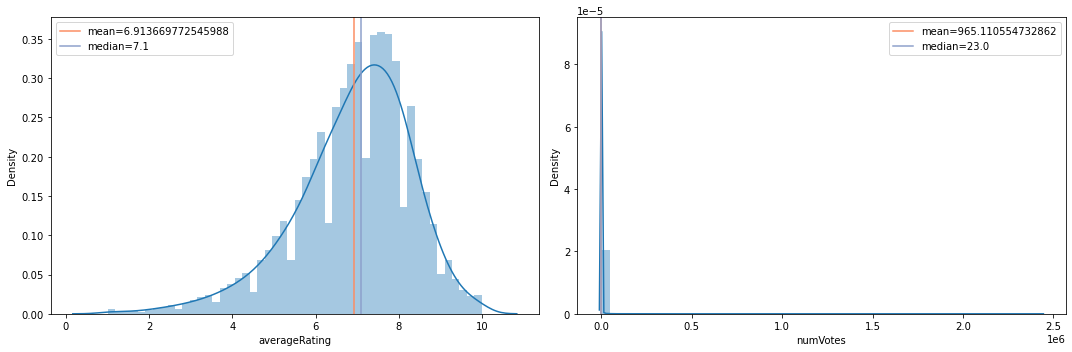

In [15]:
ratings = dict(mean=df_title_ratings.averageRating.mean(),
              median=df_title_ratings.averageRating.median())
votes = dict(mean=df_title_ratings.numVotes.mean(),
              median=df_title_ratings.numVotes.median())
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax1 = sns.distplot(df_title_ratings.averageRating,kde_kws=dict(bw=0.2))
ax1.axvline(x=ratings["mean"],c=sns.color_palette("Set2")[1],label=f"mean={ratings['mean']}")
ax1.axvline(x=ratings["median"],c=sns.color_palette("Set2")[2],label=f"median={ratings['median']}")
plt.legend()
plt.subplot(1,2,2)
ax2 = sns.distplot(df_title_ratings.numVotes,kde_kws=dict(bw=0.2))
ax2.axvline(x=votes["mean"],c=sns.color_palette("Set2")[1],label=f"mean={votes['mean']}")
ax2.axvline(x=votes["median"],c=sns.color_palette("Set2")[2],label=f"median={votes['median']}")
plt.legend()
plt.tight_layout()
plt.show()

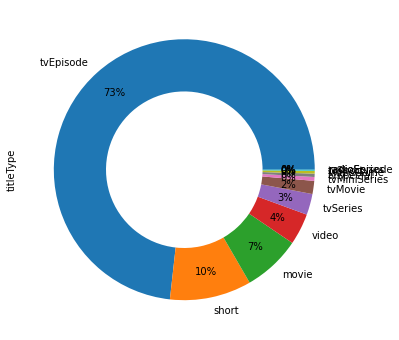

In [17]:
df_title_basic.titleType.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,
                                                 wedgeprops=dict(width=0.4))
plt.show()


<AxesSubplot:ylabel='category'>

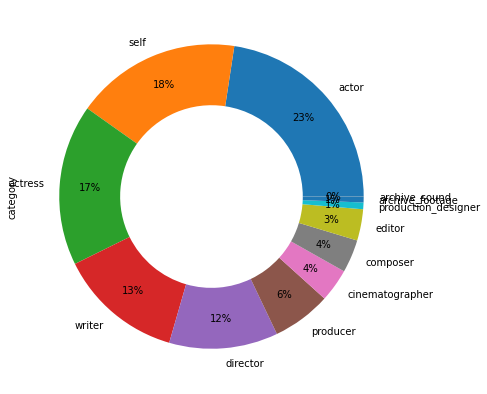

In [18]:
df_title_principals.category.value_counts().plot.pie(autopct="%.0f%%", pctdistance=0.8, figsize=(7,7),
                                                          wedgeprops=dict(width=0.4))

# Data Pre-processing and cleaning


## Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc.

In [ ]:
# Handelling "\N" by replacing to np

In [18]:
#pd.concat([df_title_akas, df_title_basic], axis=0, ignore_index=True)

In [44]:
#df_ttl_basic = pd.merge(df_title_crew, df_title_basic, on="tconst")
#df_ttl_basic_rate = pd.merge(df_ttl_basic, df_title_ratings, on="tconst")
#df_ttl_basic_rate = df_ttl_basic_rate.drop(['tconst', 'primaryTitle', 'originalTitle', 'numVotes', "writers"], axis=1)
#df_ttl_basic_rate.head()

,directors,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating
0,nm0005690,short,0,1894,1,"Documentary,Short",5.7
1,nm0721526,short,0,1892,5,"Animation,Short",6.0
2,nm0721526,short,0,1892,4,"Animation,Comedy,Romance",6.5
3,nm0721526,short,0,1892,12,"Animation,Short",6.1
4,nm0005690,short,0,1893,1,"Comedy,Short",6.2


In [19]:
cols_basic = df_title_basic.columns
num_cols_basic = df_title_basic._get_numeric_data().columns
categorical_columns_basic = list(set(cols_basic) - set(num_cols_basic))
df_title_basic[categorical_columns_basic].describe()

,runtimeMinutes,endYear,tconst,genres,titleType,isAdult,originalTitle,startYear,primaryTitle
count,8157991,8157991,8157991,8157981,8157991,8157991,8157982,8157991,8157982
unique,849,96,8157991,2289,12,9,3932302,149,3913821
top,\N,\N,tt14672266,Drama,tvEpisode,0,Episode #1.1,\N,Episode #1.1
freq,5859525,8077761,1,873725,5974964,7909472,40351,946985,40351


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
def EDA(data_frame, graphs_details):
    figure, axes = plt.subplots(1, 3, figsize=(10,3))
    figure.tight_layout()
    counter = 0
    for index, feature in enumerate(graphs_details):
        if index % 3 == 0 and index != 0:
            figure, axes = plt.subplots(1, 3, figsize=(10,3))
            figure.tight_layout()
            counter = 0
        if feature['column_type'] == 'cat':
            df = data_frame.groupby(feature['column_name']).count()
            df.iloc[:,0].plot(kind=feature['graph_type'], ax=axes[counter])
        else:
            data_frame[feature['column_name']].plot(kind=feature['graph_type'], ax=axes[counter])
        counter += 1

In [21]:
def outlier_suppression_skewed(data_frame, features):
    df = data_frame.describe()
    df = df[(df.index == '25%') | (df.index == '75%')]
    for feature in features:
        col = feature['column_name']
        q1 = df[col][0]
        q3 = df[col][1]
        IQR = q3 - q1
        data_frame.loc[(data_frame[col] > q3 + 1.5*IQR), col] = q3 + 1.5*IQR
        data_frame.loc[(data_frame[col] < q1 - 1.5*IQR), col] = q3 - 1.5*IQR
    return data_frame
        

In [22]:
clean_df_basic = outlier_suppression_skewed(df_title_basic, num_cols_basic)
clean_df_basic

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
8157986,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8157987,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8157988,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8157989,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


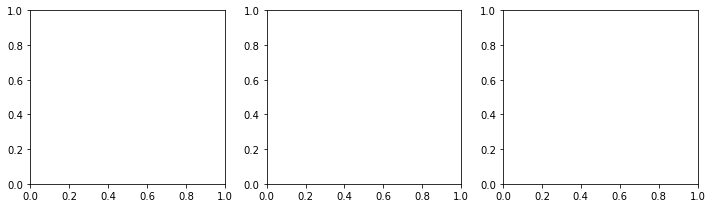

In [23]:
EDA(clean_df_basic, num_cols_basic)

In [34]:
#plt.figure(figsize=(5,5))
#sns.heatmap(df_title_basic.corr(), color='c', annot=True)

In [30]:
(df_title_ratings["averageRating"].dtype)

dtype('float64')

In [24]:
cols_rating = df_title_ratings.columns
num_cols_rating = df_title_ratings._get_numeric_data().columns
categorical_columns_rating = list(set(cols_rating) - set(num_cols_rating))
df_title_ratings[categorical_columns_rating].describe()

,tconst
count,1179054
unique,1179054
top,tt0595229
freq,1


In [31]:
num_cols_rating

Index(['averageRating', 'numVotes'], dtype='object')

In [25]:
clean_df_rating = outlier_suppression_skewed(df_title_ratings, num_cols_rating)
clean_df_rating

TypeError: string indices must be integers

In [38]:
df_ttl_b_r = pd.merge(df_title_ratings, df_title_basic, on="tconst")
df_ttl_b_r_c = pd.merge(df_ttl_b_r, df_title_crew, on="tconst")
df_ttl_b_r_c_e = pd.merge(df_ttl_b_r_c, df_title_episode, on="tconst")
#pd.concat([df_ttl_b_r_p_c_e, df_title_akas], axis=1, ignore_index=True)

df_ttl_b_r_c_e
#df_ttl_basic_rate = df_ttl_basic_rate.drop(['tconst', 'primaryTitle', 'originalTitle', 'numVotes', "writers"], axis=1)
#df_ttl_basic_rate.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,parentTconst,seasonNumber,episodeNumber
0,tt0041951,7.5,67,tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,\N,30,Western,nm0782690,"nm0872077,nm0289014,nm1080563,nm0834503",tt0041038,1,9
1,tt0042816,7.6,7,tvEpisode,Othello,Othello,0,1950,\N,135,Drama,nm0791041,nm0000636,tt0989125,1,17
2,tt0043631,7.2,8,tvEpisode,The Life of King Henry V,The Life of King Henry V,0,1951,\N,133,Drama,nm0107960,"nm0000636,nm0605925,nm0107960",tt0989125,2,16
3,tt0044093,4.1,15,tvEpisode,The Three Musketeers,The Three Musketeers,0,1950,\N,60,Drama,nm0091430,"nm0241416,nm0358139",tt0959862,1,6
4,tt0045519,6.5,7,tvEpisode,As You Like It,As You Like It,0,1953,\N,\N,Drama,nm0248157,nm0000636,tt0989125,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550132,tt9916628,8.6,5,tvEpisode,A lenda do soprador de vidro,A lenda do soprador de vidro,0,2019,\N,\N,Comedy,"nm7705496,nm5299647","nm7705496,nm7705497,nm5299647",tt9893572,1,2
550133,tt9916682,5.6,5,tvEpisode,Horrid Henry It's all Your Fault,Horrid Henry It's all Your Fault,0,2012,\N,10,"Animation,Comedy,Family",nm0996406,"nm1482639,nm2586970",tt0985991,3,44
550134,tt9916690,6.6,5,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012,\N,10,"Animation,Comedy,Family",nm0996406,"nm1482639,nm2586970",tt0985991,3,47
550135,tt9916766,6.9,18,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Reality-TV",\N,\N,tt1442550,10,15


In [ ]:
df_ttl_b_r_p_c_e = pd.merge(df_ttl_b_r_p_c, df_title_episode, on="tconst")

In [37]:
df_ttl_p_n = pd.merge(df_title_principals, df_name_basics, on="nconst")
df_ttl_p_n

,tconst,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000001,1,nm1588970,self,\N,"[""Self""]",Carmencita,1868,1910,soundtrack,"tt0000001,tt0057728"
1,tt7513040,2,nm1588970,archive_footage,\N,"[""Self""]",Carmencita,1868,1910,soundtrack,"tt0000001,tt0057728"
2,tt0000001,2,nm0005690,director,\N,\N,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt1770702"
3,tt0000005,3,nm0005690,director,\N,\N,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt1770702"
4,tt0000006,1,nm0005690,director,\N,\N,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt1770702"
...,...,...,...,...,...,...,...,...,...,...,...
46130071,tt9916856,3,nm10538646,actor,\N,"[""Stephan""]",Andreas Demmel,\N,\N,NaN,\N
46130072,tt9916856,4,nm10538647,actress,\N,"[""Kathi""]",Kathrin Knöpfle,\N,\N,NaN,"tt5641586,tt9916856"
46130073,tt9916856,5,nm10538645,director,\N,\N,Johan Planefeldt,\N,\N,director,\N
46130074,tt9916856,6,nm6951431,writer,screenplay by,\N,Johan Planefeldt,\N,\N,"writer,cinematographer,camera_department",tt4247168


In [39]:

df_ttl_merge = pd.merge(df_ttl_b_r_c_e, df_ttl_p_n, on="tconst")
df_ttl_merge

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,parentTconst,seasonNumber,episodeNumber,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0041951,7.5,67,tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,\N,30,Western,nm0782690,"nm0872077,nm0289014,nm1080563,nm0834503",tt0041038,1,9,10,nm0156134,producer,producer,\N,Jack Chertok,1906,1995,"producer,miscellaneous","tt0056775,tt0036218,tt0038990,tt0036719"
1,tt0041951,7.5,67,tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,\N,30,Western,nm0782690,"nm0872077,nm0289014,nm1080563,nm0834503",tt0041038,1,9,3,nm0071986,actor,\N,"[""Hardrock Jones""]",Ray Bennett,1895,1957,actor,"tt0030126,tt0030382,tt0041918,tt0043291"
2,tt0041951,7.5,67,tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,\N,30,Western,nm0782690,"nm0872077,nm0289014,nm1080563,nm0834503",tt0041038,1,9,4,nm0112203,actor,\N,"[""Dick Larrabee""]",Rand Brooks,1918,2003,"actor,miscellaneous,director","tt0030079,tt0044920,tt0436502,tt0031381"
3,tt0041951,7.5,67,tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,\N,30,Western,nm0782690,"nm0872077,nm0289014,nm1080563,nm0834503",tt0041038,1,9,9,nm0834503,writer,from the radio program edited by,\N,Fran Striker,1903,1962,"writer,miscellaneous","tt0032559,tt0031394,tt0182633,tt0041038"
4,tt0041951,7.5,67,tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,\N,30,Western,nm0782690,"nm0872077,nm0289014,nm1080563,nm0834503",tt0041038,1,9,1,nm0138194,actor,\N,"[""The Lone Ranger""]",Clayton Moore,1914,1999,"actor,soundtrack","tt0041038,tt0040381,tt0051876,tt0048310"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4740749,tt9916778,7.5,30,tvEpisode,Escape,Escape,0,2019,\N,\N,"Crime,Drama,Mystery",\N,\N,tt9595170,1,3,7,nm1288981,actor,\N,"[""Bahman""]",Hosein Yari,\N,\N,actor,"tt2294955,tt5352912,tt9595170,tt6580302"
4740750,tt9916778,7.5,30,tvEpisode,Escape,Escape,0,2019,\N,\N,"Crime,Drama,Mystery",\N,\N,tt9595170,1,3,2,nm1282391,actress,\N,"[""Morvarid""]",Vishka Asayesh,1972,\N,"actress,art_director,costume_designer","tt1985266,tt2357790,tt11222962,tt9595170"
4740751,tt9916778,7.5,30,tvEpisode,Escape,Escape,0,2019,\N,\N,"Crime,Drama,Mystery",\N,\N,tt9595170,1,3,1,nm1568421,actor,\N,"[""Khaleghi""]",Farhad Aeesh,\N,\N,actor,"tt2499148,tt0877708,tt12856524,tt10570028"
4740752,tt9916778,7.5,30,tvEpisode,Escape,Escape,0,2019,\N,\N,"Crime,Drama,Mystery",\N,\N,tt9595170,1,3,3,nm5331326,actor,\N,"[""Nader""]",Hamid Reza Azarang,\N,\N,"actor,writer,director","tt2548096,tt13933904,tt6193572,tt8442180"


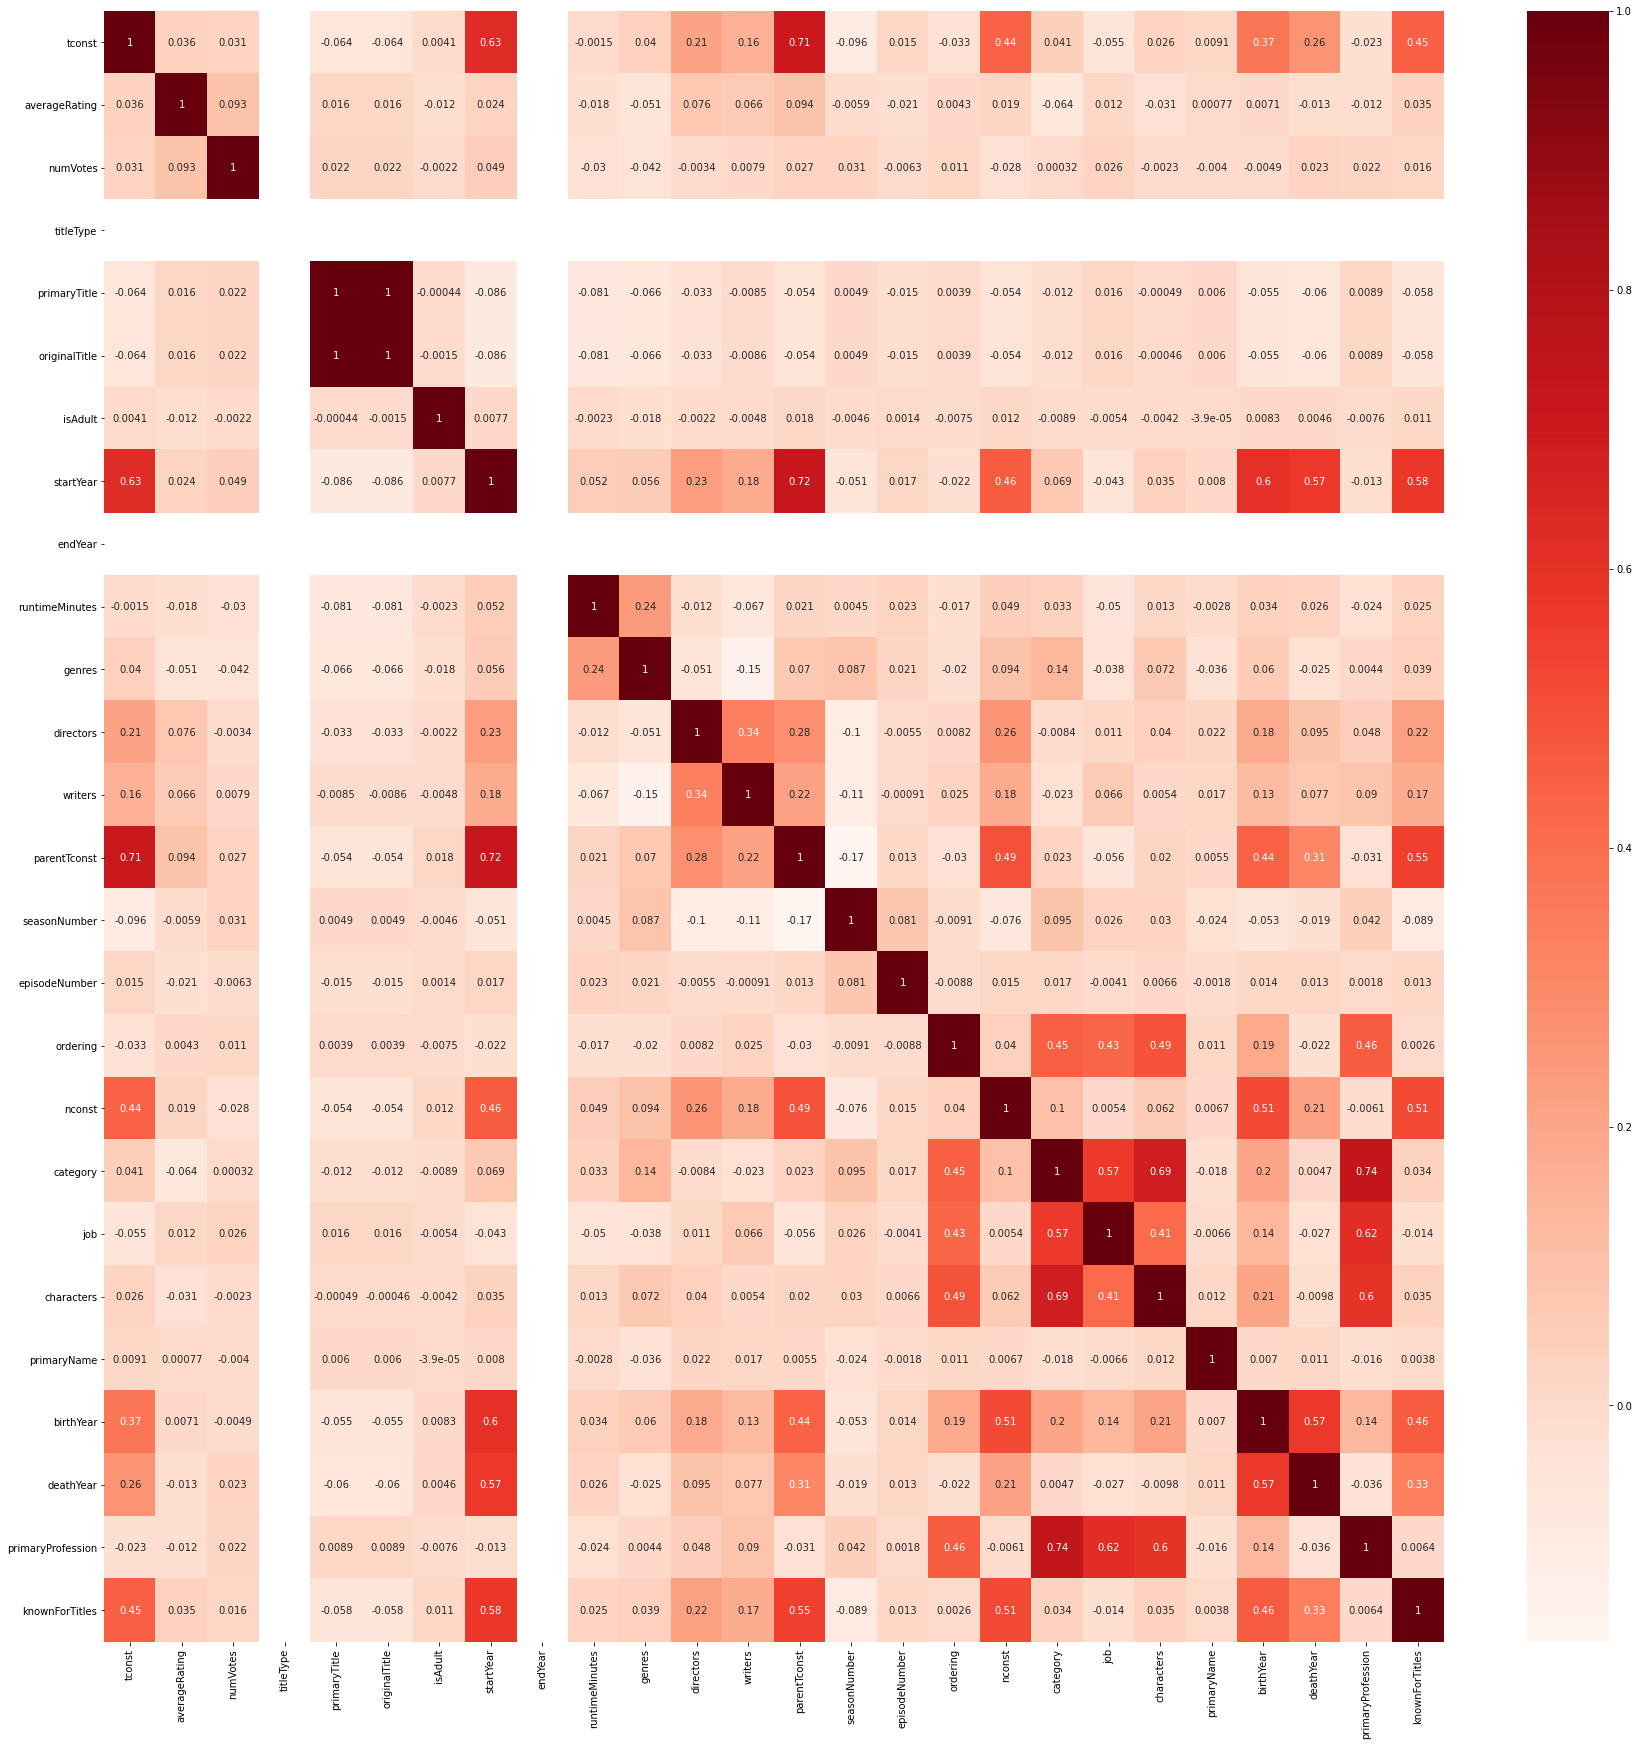

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,30))

for col_name in df_ttl_merge.columns:
    if(df_ttl_merge[col_name].dtype == 'object'):
        df_ttl_merge[col_name]= df_ttl_merge[col_name].astype('category')
        df_ttl_merge[col_name] = df_ttl_merge[col_name].cat.codes

cor = df_ttl_merge.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [46]:
df_ttl_merge.columns

Index(['tconst', 'averageRating', 'numVotes', 'titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes',
       'genres', 'directors', 'writers', 'parentTconst', 'seasonNumber',
       'episodeNumber', 'ordering', 'nconst', 'category', 'job', 'characters',
       'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles'],
      dtype='object')

In [24]:
df_ttl_basic_rate.replace("\\N", np.nan)

,directors,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating
0,nm0005690,short,0,1894,1,"Documentary,Short",5.7
1,nm0721526,short,0,1892,5,"Animation,Short",6.0
2,nm0721526,short,0,1892,4,"Animation,Comedy,Romance",6.5
3,nm0721526,short,0,1892,12,"Animation,Short",6.1
4,nm0005690,short,0,1893,1,"Comedy,Short",6.2
...,...,...,...,...,...,...,...
1179049,nm0996406,tvEpisode,0,2012,10,"Animation,Comedy,Family",5.6
1179050,nm0996406,tvEpisode,0,2012,10,"Animation,Comedy,Family",6.6
1179051,nm10538600,short,0,2019,10,"Comedy,Horror,Mystery",5.5
1179052,NaN,tvEpisode,0,2019,43,"Family,Reality-TV",6.9


In [50]:
from sklearn.model_selection import train_test_split
X = df_ttl_merge[['tconst', 'averageRating', 'numVotes', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres',
       'directors', 'writers', 'parentTconst', 'seasonNumber', 'episodeNumber', 'ordering', 'nconst',
       'category', 'job', 'characters', 'primaryName', 'birthYear',
       'deathYear', 'primaryProfession', 'knownForTitles']]  # Features
y = df_ttl_merge['averageRating']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [36]:
def remove_comma(text):
        text = text.replace(",", " ")
        return text

In [23]:
#t_crw_bas = pd.merge(df_title_crew, df_title_basic, on="tconst")
#t_crw_bas_ep= pd.merge(t_crw_bas, df_title_episode, on="tconst")
#t_crw_bas_ep_prn = pd.merge(t_crw_bas_ep, df_title_principals, on="tconst")
#t_crw_bas_ep_prn_rat = pd.merge(t_crw_bas_ep_prn, df_title_ratings, on="tconst")
#t_crw_bas_ep_prn_rat_aks = t_crw_bas_ep_prn_rat[df_title_akas]
#t_crw_bas_ep_prn_rat_aks.head()

<AxesSubplot:>

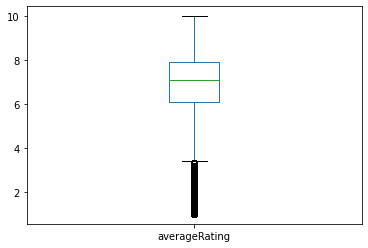

In [9]:
#title_ratings.plot.box()
title_ratings["averageRating"].plot.box()

## Feature Engineering

#### joining title details with title ratings
#### Total Titles :- 8179764
#### Total titles rated rated:- 1181105

In [4]:

ml_inferencing_input = pd.merge(df_title_ratings, df_title_basic,on=['tconst'] )
ml_inferencing_input

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1803,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,6.0,232,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,6.5,1553,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,6.1,152,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,6.2,2376,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...,...,...
1181100,tt9916682,5.6,5,tvEpisode,Horrid Henry It's all Your Fault,Horrid Henry It's all Your Fault,0,2012,\N,10,"Animation,Comedy,Family"
1181101,tt9916690,6.6,5,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012,\N,10,"Animation,Comedy,Family"
1181102,tt9916720,5.4,123,short,The Nun 2,The Nun 2,0,2019,\N,10,"Comedy,Horror,Mystery"
1181103,tt9916766,6.9,18,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Reality-TV"


In [8]:
df_title_episode

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0020666,tt15180956,1,2
1,tt0021166,tt15180956,1,3
2,tt0021612,tt15180956,2,2
3,tt0021664,tt15180956,2,4
4,tt0021701,tt15180956,2,1
...,...,...,...,...
5992524,tt9916846,tt1289683,3,18
5992525,tt9916848,tt1289683,3,17
5992526,tt9916850,tt1289683,3,19
5992527,tt9916852,tt1289683,3,20


#### Extracting parent title rating for title.episode and then joined with title details and title ratings

In [14]:
df_temp = pd.merge(df_title_episode, ml_inferencing_input, left_on='parentTconst', right_on='tconst')[['tconst_x','averageRating']]
df_temp.rename(columns = {'averageRating':'parentRating', 'tconst_x': 'tconst'}, inplace = True)
ml_inferencing_input = pd.merge(ml_inferencing_input, df_temp, how='left', on='tconst')

In [16]:
ml_inferencing_input.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,parentRating
0,tt0000001,5.7,1803,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",NaN
1,tt0000002,6.0,232,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",NaN
2,tt0000003,6.5,1553,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",NaN
3,tt0000004,6.1,152,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",NaN
4,tt0000005,6.2,2376,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",NaN


In [27]:
ml_inferencing_input = ml_inferencing_input[['tconst', 'averageRating', 'numVotes', 'titleType', 'isAdult', 'runtimeMinutes',
       'parentRating']]

In [33]:
ml_inferencing_input.fillna({'parentRating':0, 'averageRating':0})

,tconst,averageRating,numVotes,titleType,isAdult,runtimeMinutes,parentRating
0,tt0000001,5.7,1803,short,0,1,0.0
1,tt0000002,6.0,232,short,0,5,0.0
2,tt0000003,6.5,1553,short,0,4,0.0
3,tt0000004,6.1,152,short,0,12,0.0
4,tt0000005,6.2,2376,short,0,1,0.0
...,...,...,...,...,...,...,...
1181100,tt9916682,5.6,5,tvEpisode,0,10,6.4
1181101,tt9916690,6.6,5,tvEpisode,0,10,6.4
1181102,tt9916720,5.4,123,short,0,10,0.0
1181103,tt9916766,6.9,18,tvEpisode,0,43,7.6


In [62]:
df_temp = ml_inferencing_input['runtimeMinutes']
df_temp = pd.to_numeric(df_temp, errors='coerce')
ml_inferencing_input['runtimeMinutes'] =  df_temp.fillna(df_temp.mean())
ml_inferencing_input

,tconst,averageRating,numVotes,isAdult,runtimeMinutes,parentRating,short,tvEpisode,tvMiniSeries,tvMovie,tvSeries,tvShort,tvSpecial,video,videoGame
0,tt0000001,5.7,1803,0,1.000000,0.0,1,0,0,0,0,0,0,0,0
1,tt0000002,6.0,232,0,5.000000,0.0,1,0,0,0,0,0,0,0,0
2,tt0000003,6.5,1553,0,4.000000,0.0,1,0,0,0,0,0,0,0,0
3,tt0000004,6.1,152,0,12.000000,0.0,1,0,0,0,0,0,0,0,0
4,tt0000005,6.2,2376,0,1.000000,0.0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181100,tt9916682,5.6,5,0,10.000000,6.4,0,1,0,0,0,0,0,0,0
1181101,tt9916690,6.6,5,0,10.000000,6.4,0,1,0,0,0,0,0,0,0
1181102,tt9916720,5.4,123,0,10.000000,0.0,1,0,0,0,0,0,0,0,0
1181103,tt9916766,6.9,18,0,43.000000,7.6,0,1,0,0,0,0,0,0,0


In [36]:
dummies = pd.get_dummies(ml_inferencing_input['titleType'], drop_first= True)
ml_inferencing_input = pd.concat([ml_inferencing_input, dummies], axis=1)
ml_inferencing_input = ml_inferencing_input.drop(['titleType'], axis=1)

In [63]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = ml_inferencing_input.drop(['tconst', 'averageRating'], axis=1).values
# Separating out the target
y = ml_inferencing_input['averageRating'].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Model Trainining

#### Linear regression

In [66]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = regressor.predict(X_test)

In [70]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,6.7,6.789638
1,4.9,7.285027
2,8.6,7.651714
3,7.6,8.109828
4,7.2,7.559798


In [71]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9411756324847325
Mean Squared Error: 1.563495487852762
Root Mean Squared Error: 1.2503981317375525


#### Random Forrest

In [74]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(n_estimators=50, random_state=0)

In [75]:
y_test = regressor.predict(X_test)

In [76]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,6.770649,6.789638
1,7.284996,7.285027
2,8.087929,7.651714
3,7.585706,8.109828
4,7.364318,7.559798


In [77]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.41679862578118393
Mean Squared Error: 0.3548479878653178
Root Mean Squared Error: 0.5956911849820491


### GBT

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [80]:
y_test = reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,6.670582,6.789638
1,7.247233,7.285027
2,7.664172,7.651714
3,8.170005,8.109828
4,7.533747,7.559798


In [81]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1619858203226993
Mean Squared Error: 0.05294688939447028
Root Mean Squared Error: 0.23010191088835025
